# Data Processing Approach for Portfolio Project

## Project Title: Don'tDie(DD)

## Student Name: Avit Brian MUGISHA

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

  - **Data Sources:** The dataset used for this project is sourced from the UCI Machine Learning Repository: [Heart Failure Clinical Records](https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records).

   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

  - **Data Aggregation:** The dataset provides comprehensive clinical records related to heart failure patients. For this project, I will only use this single source as it covers a wide range of relevant features.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv'
df = pd.read_csv("heartfailure_dataset.csv")

# Summary statistics
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1




2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

    - **Current Format:** The dataset is structured in a tabular format with features such as age, anaemia, creatinine phosphokinase levels, etc.
    - **Transformation Plan:** The data is already in a unified format suitable for analysis and modeling. Standardization will applied after separating features from target.




In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming df is your DataFrame containing the dataset

# Separate features and target
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Identify numerical columns
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# Apply scaling to numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
X_processed = X
X_processed.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
    - **Features:** Features included in the dataset are: age, anaemia, creatinine phosphokinase, diabetes, ejection fraction, high blood pressure, platelets, serum creatinine, serum sodium, sex, smoking, time, and DEATH_EVENT.
  
    - **Findings:** Conducted exploratory data analysis (EDA) to understand distributions, correlations, and outliers in the dataset. age, ejection_fraction, serum_creatinine and serum_sodium where selected to provide a deeper analysis of the features in relationship to the target DEATH_EVENT. these features seemed to be the most relevant to heart failure and three of them were capped because of outliers.



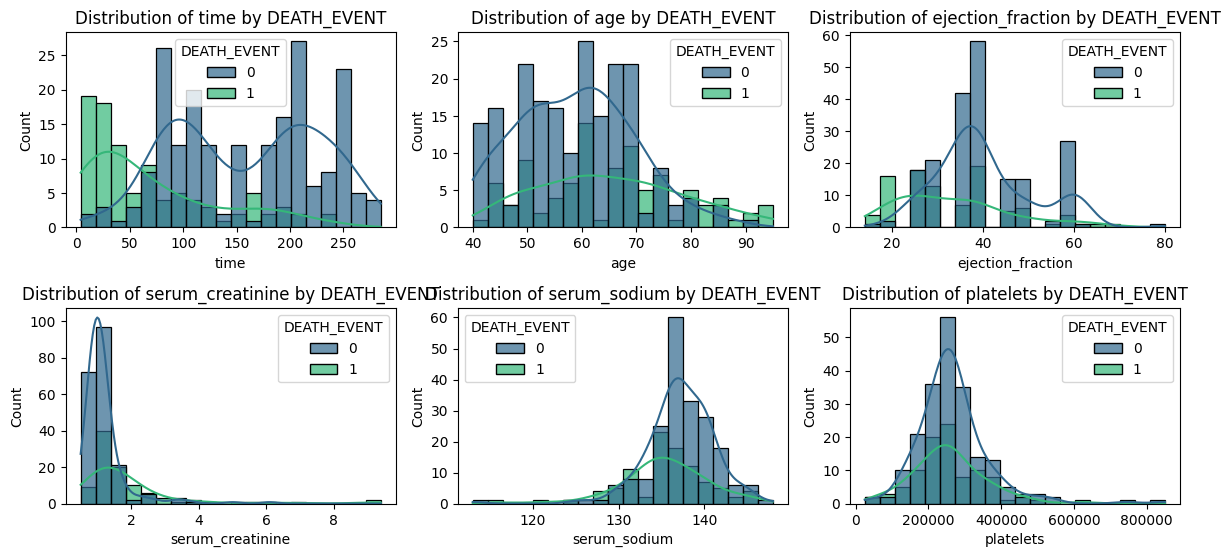

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting features for EDA
selected_features = ['time','age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium','platelets']

# Plotting distributions for selected features by target variable
plt.figure(figsize=(12, 8))

for i, feature in enumerate(selected_features, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=feature, hue='DEATH_EVENT', kde=True, bins=20, alpha=0.7, palette='viridis')
    plt.title(f'Distribution of {feature} by DEATH_EVENT')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()




4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

    - **Hypothesis 1:** Age is positively correlated with the probability of death events.
    - **Hypothesis 2 :** time(follow-up period) increases the risk of death events among heart failure patients.

5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

    - **Data Density:** Assess the density of missing data.
    - **Strategies:** Implement strategies such as mean imputation for missing values and IQR method for outlier detection.


In [ ]:
import pandas as pd

# Calculate quantiles for capping
ef_cap = df['ejection_fraction'].quantile(0.99)
sc_cap = df['serum_creatinine'].quantile(0.99)
ss_cap = df['serum_sodium'].quantile(0.01)

# Cap extreme values for selected features
X_processed['ejection_fraction'] = X_processed['ejection_fraction'].clip(upper=ef_cap)
X_processed['serum_creatinine'] = X_processed['serum_creatinine'].clip(upper=sc_cap)
X_processed['serum_sodium'] = X_processed['serum_sodium'].clip(lower=ss_cap)

# Impute missing values with mean
X_processed = X_processed.fillna(X_processed.mean())

X_processed.head()



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,123.94,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,123.94,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,123.94,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,123.94,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,123.94,-1.359272,-0.687682,-1.577879


6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.
    - **Methodology:** Split the dataset into training, validation, and testing sets.
    - **Considerations:** Ensure randomness and stratification based on the 'DEATH_EVENT' for representativeness.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
    - **Techniques:** SMOT was used to address class imbalance in 'DEATH_EVENT'


In [ ]:
from sklearn.model_selection import train_test_split

X = X_processed
y
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# Print shapes to verify
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape} \n")

#before SMOTE
class_distribution = y_train.value_counts()
print("before resampling:", class_distribution, "\n")
from imblearn.over_sampling import SMOTE

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("after resampling",y_train_resampled.value_counts())


X_train shape: (179, 12), y_train shape: (179,)
X_val shape: (60, 12), y_val shape: (60,)
X_test shape: (60, 12), y_test shape: (60,) 

before resampling: DEATH_EVENT
0    121
1     58
Name: count, dtype: int64 

after resampling DEATH_EVENT
1    121
0    121
Name: count, dtype: int64


8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your working code-wise **



9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

    - **Data Types:** The dataset include numerical and categorical data.

      - Numerical Columns:

          age,
          creatinine_phosphokinase,
          ejection_fraction,
          platelets,
          serum_creatinine,
          serum_sodium,
          time,
      - Categorical Columns:

          anaemia (binary: 0 or 1),
          diabetes (binary: 0 or 1),
          high_blood_pressure (binary: 0 or 1),
          sex (binary: 0 or 1),
          smoking (binary: 0 or 1),
          DEATH_EVENT (binary: 0 or 1)
    - **Preprocessing:** Plan preprocessing steps such as encoding categorical variables and scaling numerical features.


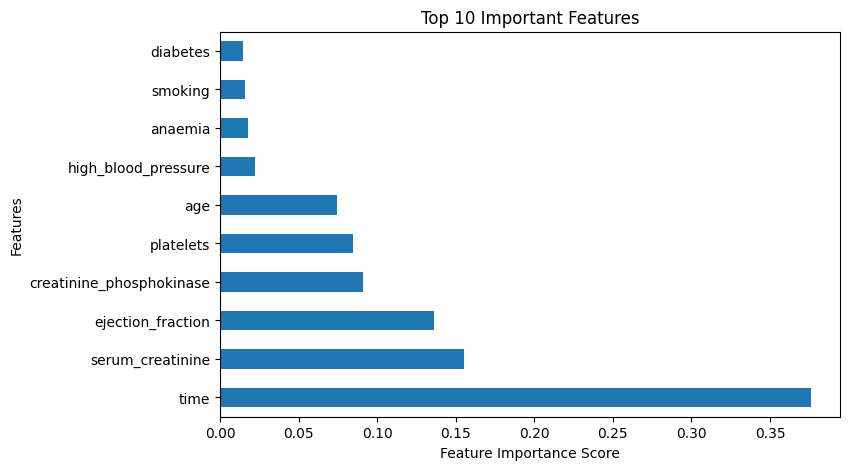

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8, 5))
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()



10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

      - **Methods:** Normalize numerical features and encode categorical variables for model training.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.
      - **Storage Solution:** Store processed data in a structured format such as CSV files or a database for accessibility and security.


---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.